In [432]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
#os.chdir('/Users/Sriram/Desktop/DePaul/Q5/CSC529/Project 1/Analyzing-Housing-Data') # set to data dir
os.chdir('C:/Users/SYARLAG1/Desktop/Analyzing-Housing-Data')
seed = 99 # used for setting random seeds

In [401]:
# read in data
data = pd.read_csv('ames.csv', na_values='NA')
# data documentation: https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt

In [402]:
data.shape # 81 features

(2930, 82)

In [403]:
pd.set_option('display.max_columns', None)
data.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [404]:
# converting variables into appropriate data types
data['Year.Built'] = data['Year.Built'].astype('str') # year
data['Yr.Sold'] = data['Yr.Sold'].astype('str') # year
data['Overall.Qual'] = data['Overall.Qual'].astype('str')
data['Overall.Cond'] = data['Overall.Cond'].astype('str')
# data['Bsmt.Full.Bath'] = data['Bsmt.Full.Bath'].astype('int') # discrete
# data['Bsmt.Half.Bath'] = data['Bsmt.Half.Bath'].astype('int') # discrete
# data['Full.Bath'] = data['Full.Bath'].astype('int') # discrete
# data['Half.Bath'] = data['Half.Bath'].astype('int') # discrete
# data['Bedroom.AbvGr'] = data['Bedroom.AbvGr'].astype('int') # discrete
# data['Kitchen.AbvGr'] = data['Kitchen.AbvGr'].astype('int') # discrete
# data['TotRms.AbvGrd'] = data['TotRms.AbvGrd'].astype('int') # discrete
# data['Fireplaces'] = data['Fireplaces'].astype('str') # discrete
data['Garage.Yr.Blt'] = data['Garage.Yr.Blt'].astype('str') # year
data['Garage.Cars'] = data['Garage.Cars'].astype('str') # month
data['Mo.Sold'] = data['Mo.Sold'].astype('str') # year
data['Yr.Sold'] = data['Yr.Sold'].astype('str') # month
data['Year.Remod.Add'] = data['Year.Remod.Add'].astype('str') # year

In [405]:
# clean the data
## remove unnecessary features (PID, Order)
del data['Order']
del data['PID']
del data['MS.SubClass']
del data['Misc.Val']

In [406]:
## filling missing values
NaNLst = np.sum(data.isnull(),0) # missing value count by feature
NaNLst[NaNLst > 0]

Lot.Frontage       490
Alley             2732
Mas.Vnr.Type        23
Mas.Vnr.Area        23
Bsmt.Qual           80
Bsmt.Cond           80
Bsmt.Exposure       83
BsmtFin.Type.1      80
BsmtFin.SF.1         1
BsmtFin.Type.2      81
BsmtFin.SF.2         1
Bsmt.Unf.SF          1
Total.Bsmt.SF        1
Electrical           1
Bsmt.Full.Bath       2
Bsmt.Half.Bath       2
Fireplace.Qu      1422
Garage.Type        157
Garage.Finish      159
Garage.Area          1
Garage.Qual        159
Garage.Cond        159
Pool.QC           2917
Fence             2358
Misc.Feature      2824
dtype: int64

We deal with missing values in each feature seperately. 

As a first step, let us look at plots of how certain features relate to the Sales Price variable. We only focus on the features with a very hihg number of missing values (>1000)

Based on the relationship, we can either discard the feature or fill in the missing values

In [407]:
def generatePlots(featureLst,data):
    for feature in featureLst:
        if data[feature].dtype == 'object':
            sns.stripplot(data[feature], data['SalePrice'], jitter=True)
            plt.show()
        else:
            sns.regplot(data[feature],data['SalePrice'], dropna=True)
            plt.show()
    return

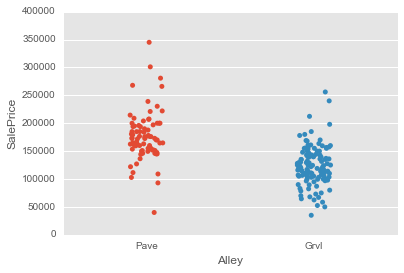

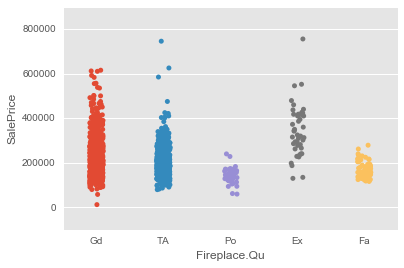

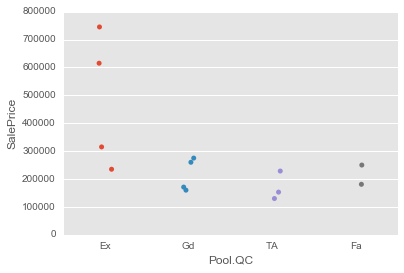

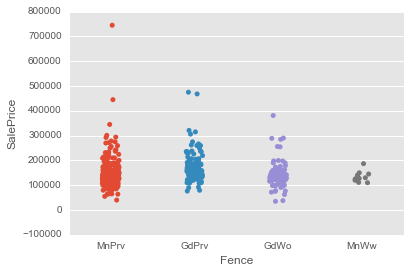

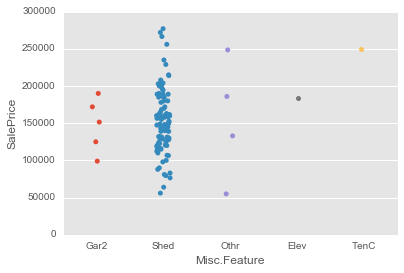

In [408]:
generatePlots(NaNLst[NaNLst > 1000].index,data)

Based on these plots and the NA count, it is evident that not all features are necessary -- for example, Misc Feature seems unnecessary -- it doesnt seem to assist in predicting the Sales Price, and at the same time is very sparsely filled in. Hence, we discard such variables. 

Variables that will be removed based on this analysis: Pool.QC, Misc.Feature, Fence, and Fireplace.Qu.

Variables like Alley, also have a high number of missing values (2732), however, since we can see a clear different in sales categories between their various classes, we will not remove such variables.

In [409]:
del data['Pool.QC']
del data['Misc.Feature']
del data['Fence']
del data['Fireplace.Qu']

In [410]:
from sklearn import linear_model # needed to impute missing values of continuous variables 

def NAFill(featureLst, data):
    
    newData = data.copy(deep=True)
    
    for feature in featureLst:
        print feature
        
        # if data type is categorical, fill in with category closest to avg of Sales Price
        if newData[feature].dtype == 'object': 
            #print True
            categoryDict = {}
            for category in set(newData[feature]):
                if pd.isnull(category): # we will skip missing value category
                    continue
                categoryDict[category] = np.mean(data[data[feature] == category]['SalePrice']) # creating a dict of the means
            for index, value in enumerate(newData[feature]):
                if not pd.isnull(value):
                    continue
                # the index that corresponds to lowest price
                closestSalesPriceValueIdx = min(range(len(categoryDict.values())),key=lambda i:\
                                                abs(categoryDict.values()[i]-data['SalePrice'][index]))
                # the missing value replaced by corresponding category
                newData[feature][index] = categoryDict.keys()[closestSalesPriceValueIdx] 
    
        else: # if feature is continuous, use regression to fill in missing value 
                reg = linear_model.LinearRegression()
                # use only the non-missing value for model
                x = pd.DataFrame(newData[newData[feature].notnull()]['SalePrice'])
                y = pd.DataFrame(newData[newData[feature].notnull()][feature])
                reg.fit(x, y) 
                for index, value in enumerate(newData[feature]):
                    if not pd.isnull(value):
                        continue
                    newData[feature][index] = reg.predict(newData['SalePrice'][index])
    return newData

In [411]:
NaNLst = np.sum(data.isnull(),0)

cleanData = NAFill(NaNLst[NaNLst > 0].index, data); 

Lot.Frontage


C:\Users\SYARLAG1\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Alley


C:\Users\SYARLAG1\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Mas.Vnr.Type
Mas.Vnr.Area
Bsmt.Qual
Bsmt.Cond
Bsmt.Exposure
BsmtFin.Type.1
BsmtFin.SF.1
BsmtFin.Type.2
BsmtFin.SF.2
Bsmt.Unf.SF
Total.Bsmt.SF
Electrical
Bsmt.Full.Bath
Bsmt.Half.Bath
Garage.Type
Garage.Finish
Garage.Area
Garage.Qual
Garage.Cond


In [412]:
NaNLst = np.sum(cleanData.isnull(),0); sum(NaNLst > 0) 

0

Hence we can see here that there are NO more missing values in our dataset. We now move into performing some basic data exploration.

## Data Exploration

In [420]:
def exploreFeatures(data):
    plt.rcParams['figure.figsize'] = (5, 5)
    for feature in data.columns:
        if feature == 'SalePrice': continue
        print 'Information About ', feature, ':\n'
        if data[feature].dtype == 'object':
            'Bar Plot: \n'
            sns.barplot(data[feature], data['SalePrice'])
            plt.show()
            'Value Counts: \n'
            data[feature].value_counts()
            print '\n'
        else:
            print 'Scatter Plot with Trend Line: \n'
            sns.regplot(data[feature],data['SalePrice'], dropna=True)
            plt.show()
            'Histogram Plot of Feature: \n'
            sns.distplot(data[feature])
            plt.show()
            '\nFive-number summary: \n'
            print data[feature].describe()
            print '\n Correlation with Target Variable (SalePrice):\n'
            print np.corrcoef(data[feature],data['SalePrice'])
            print '\n\n'
            
    return

Information About  MS.Zoning :



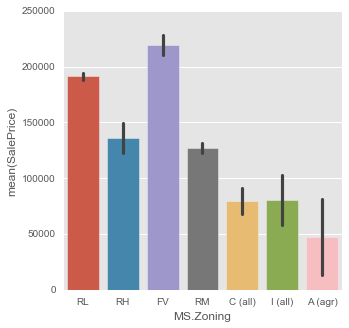



Information About  Lot.Frontage :

Scatter Plot with Trend Line: 



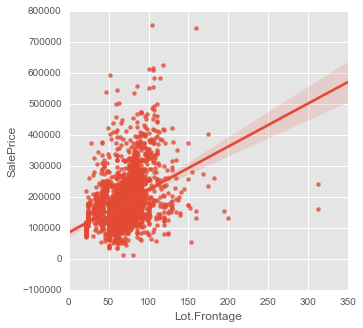

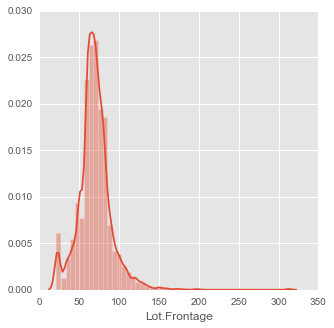

count    2930.000000
mean       69.294225
std        21.456664
min        21.000000
25%        60.000000
50%        68.114575
75%        79.194987
max       313.000000
Name: Lot.Frontage, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.         0.3723303]
 [ 0.3723303  1.       ]]



Information About  Lot.Area :

Scatter Plot with Trend Line: 



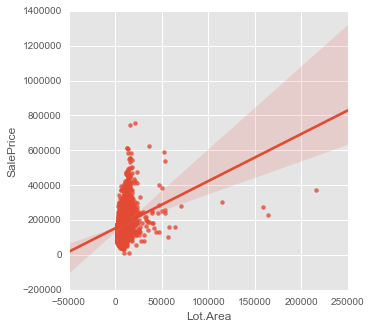

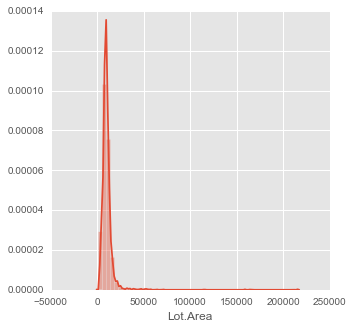

count      2930.000000
mean      10147.921843
std        7880.017759
min        1300.000000
25%        7440.250000
50%        9436.500000
75%       11555.250000
max      215245.000000
Name: Lot.Area, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.26654922]
 [ 0.26654922  1.        ]]



Information About  Street :



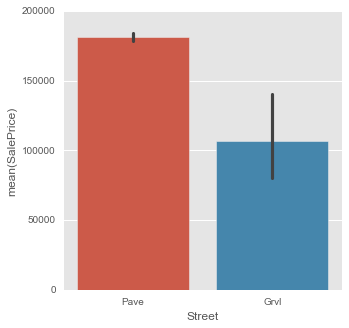



Information About  Alley :



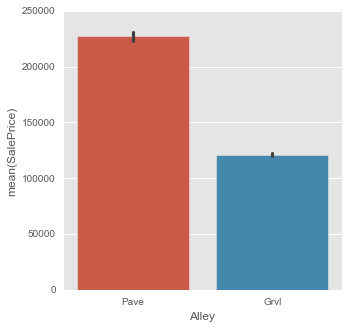



Information About  Lot.Shape :



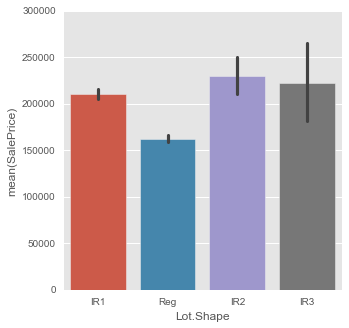



Information About  Land.Contour :



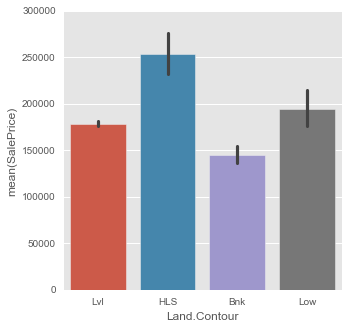



Information About  Utilities :



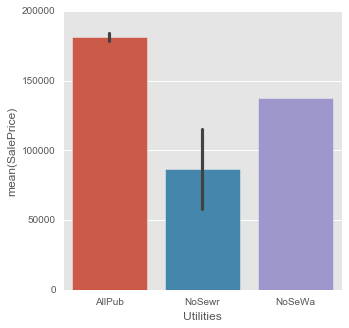



Information About  Lot.Config :



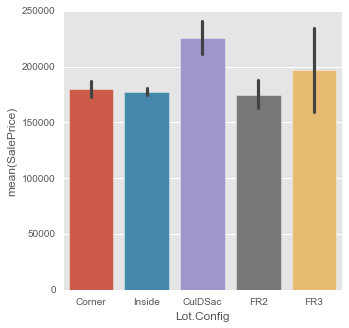



Information About  Land.Slope :



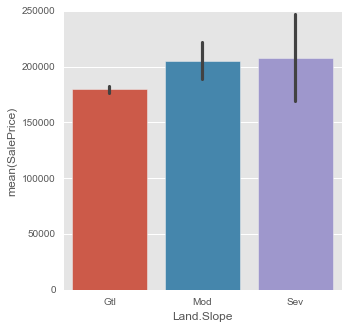



Information About  Neighborhood :



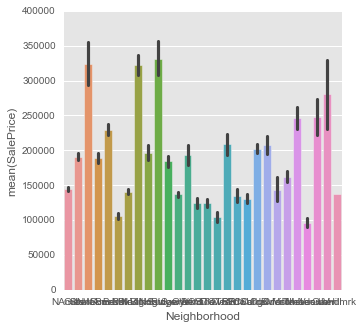



Information About  Condition.1 :



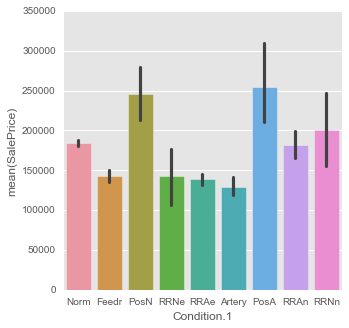



Information About  Condition.2 :



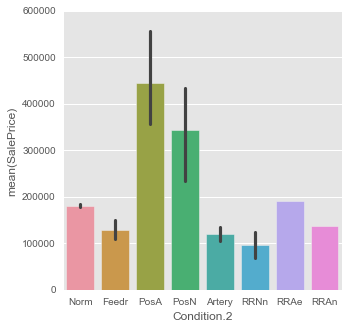



Information About  Bldg.Type :



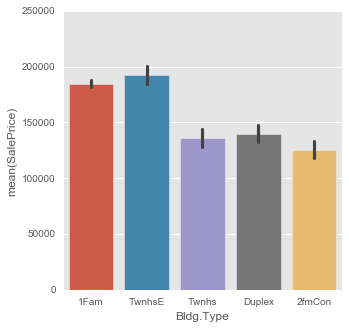



Information About  House.Style :



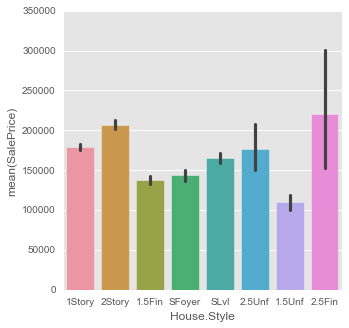



Information About  Overall.Qual :



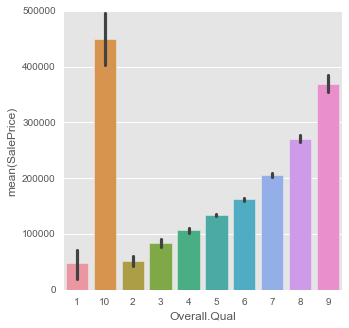



Information About  Overall.Cond :



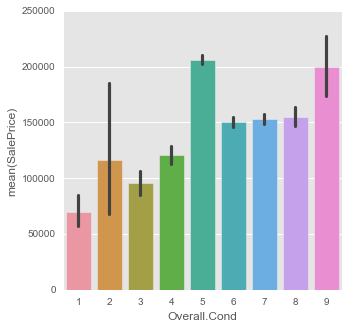



Information About  Year.Built :



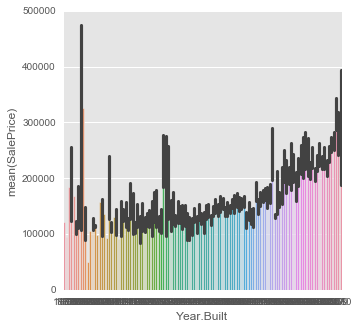



Information About  Year.Remod.Add :



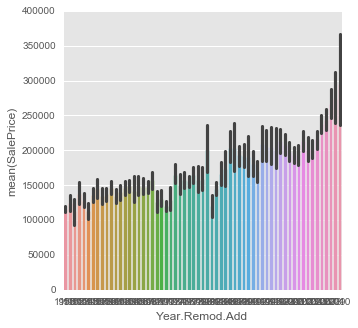



Information About  Roof.Style :



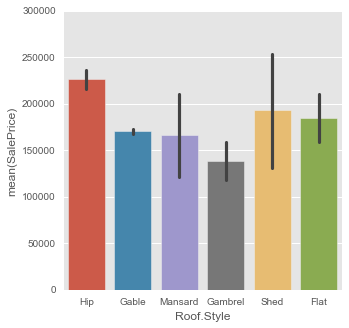



Information About  Roof.Matl :



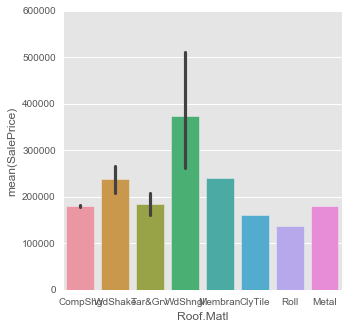



Information About  Exterior.1st :



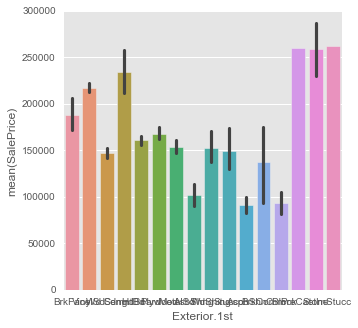



Information About  Exterior.2nd :



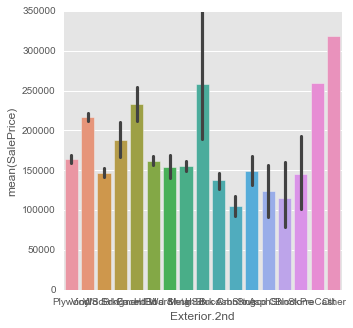



Information About  Mas.Vnr.Type :



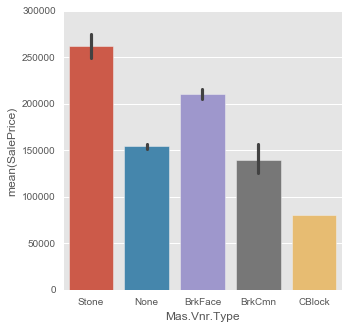



Information About  Mas.Vnr.Area :

Scatter Plot with Trend Line: 



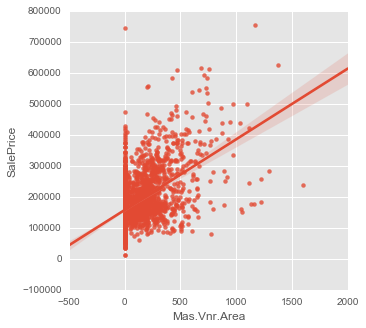

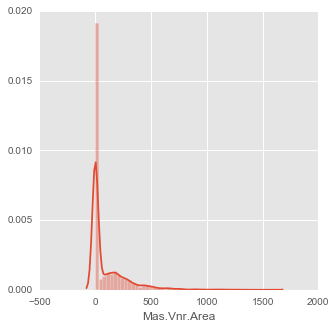

count    2930.000000
mean      102.371116
std       178.636296
min         0.000000
25%         0.000000
50%         0.000000
75%       164.750000
max      1600.000000
Name: Mas.Vnr.Area, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.51014513]
 [ 0.51014513  1.        ]]



Information About  Exter.Qual :



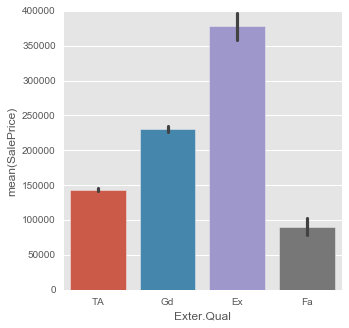



Information About  Exter.Cond :



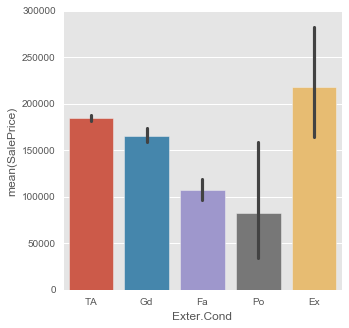



Information About  Foundation :



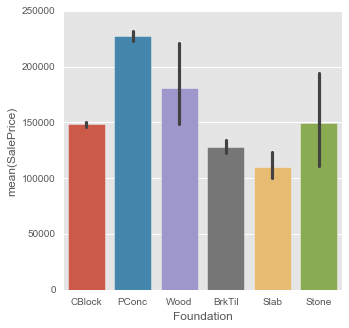



Information About  Bsmt.Qual :



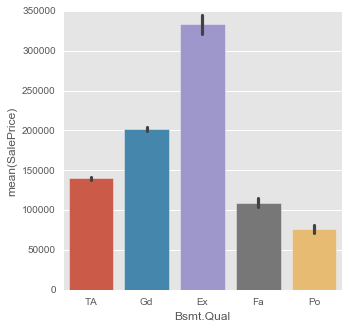



Information About  Bsmt.Cond :



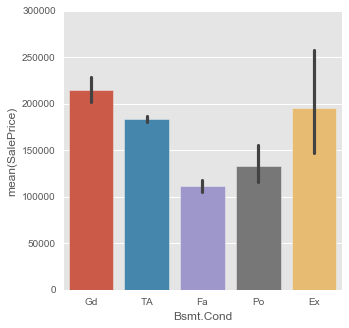



Information About  Bsmt.Exposure :



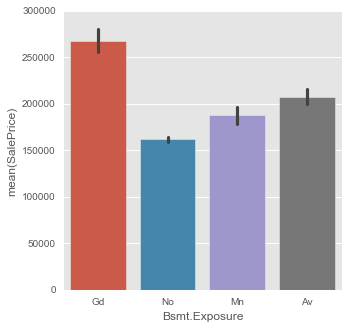



Information About  BsmtFin.Type.1 :



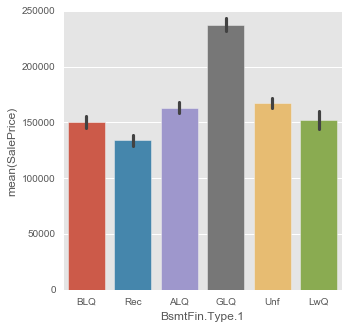



Information About  BsmtFin.SF.1 :

Scatter Plot with Trend Line: 



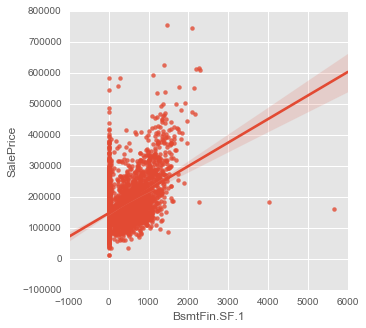

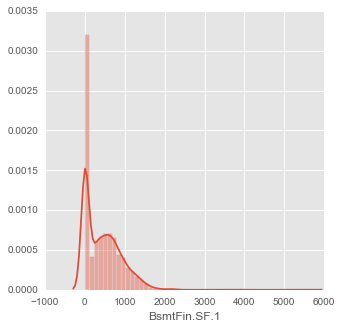

count    2930.000000
mean      442.543752
std       455.536744
min         0.000000
25%         0.000000
50%       370.000000
75%       734.000000
max      5644.000000
Name: BsmtFin.SF.1, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.43301198]
 [ 0.43301198  1.        ]]



Information About  BsmtFin.Type.2 :



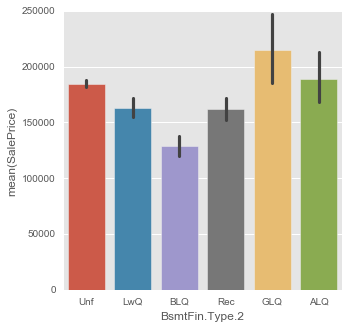



Information About  BsmtFin.SF.2 :

Scatter Plot with Trend Line: 



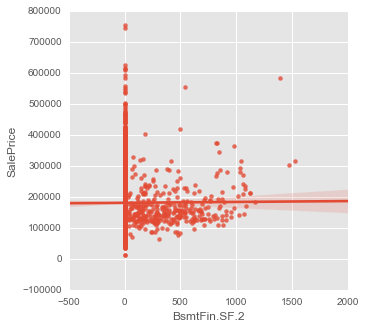

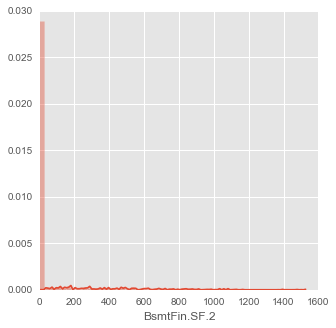

count    2930.000000
mean       49.721997
std       169.139597
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFin.SF.2, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.00589303]
 [ 0.00589303  1.        ]]



Information About  Bsmt.Unf.SF :

Scatter Plot with Trend Line: 



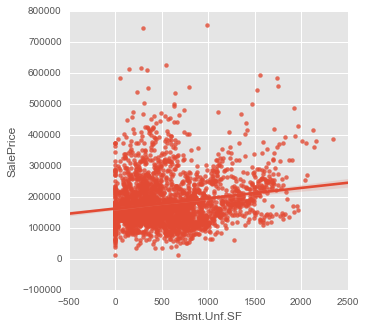

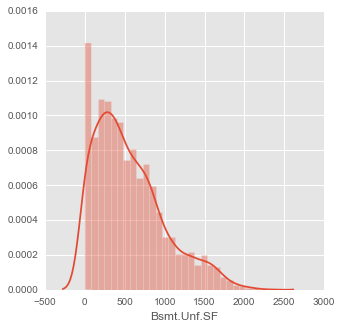

count    2930.000000
mean      559.227581
std       439.423198
min         0.000000
25%       219.000000
50%       465.500000
75%       801.750000
max      2336.000000
Name: Bsmt.Unf.SF, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.18290429]
 [ 0.18290429  1.        ]]



Information About  Total.Bsmt.SF :

Scatter Plot with Trend Line: 



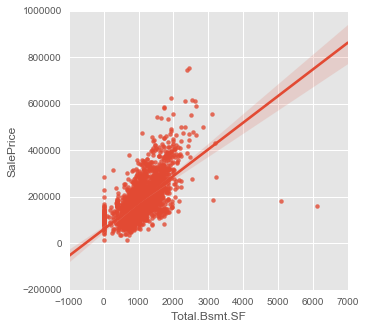

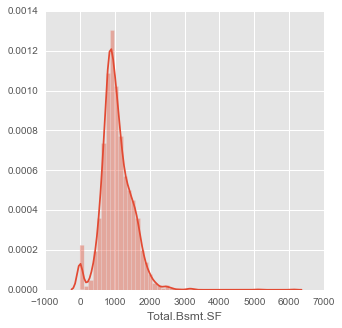

count    2930.000000
mean     1051.493330
std       440.588702
min         0.000000
25%       793.000000
50%       990.000000
75%      1301.500000
max      6110.000000
Name: Total.Bsmt.SF, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.63238571]
 [ 0.63238571  1.        ]]



Information About  Heating :



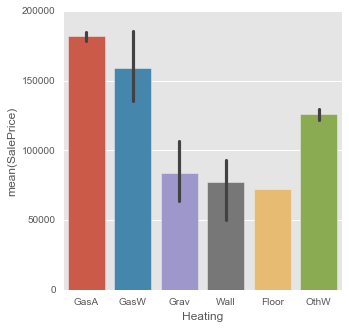



Information About  Heating.QC :



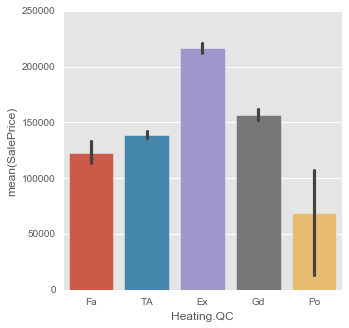



Information About  Central.Air :



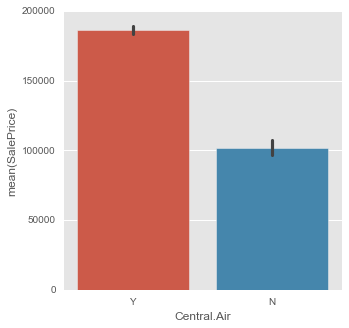



Information About  Electrical :



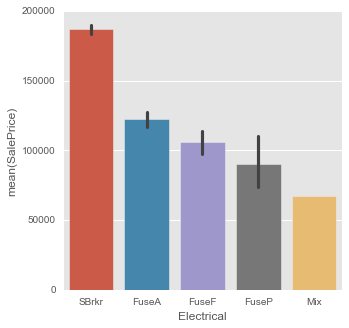



Information About  X1st.Flr.SF :

Scatter Plot with Trend Line: 



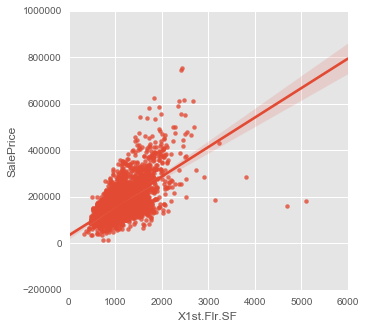

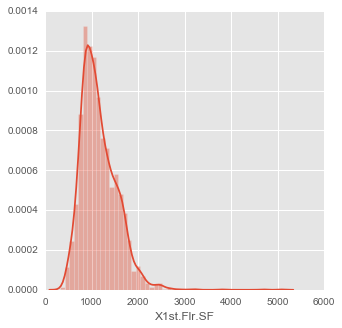

count    2930.000000
mean     1159.557679
std       391.890885
min       334.000000
25%       876.250000
50%      1084.000000
75%      1384.000000
max      5095.000000
Name: X1st.Flr.SF, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.62167606]
 [ 0.62167606  1.        ]]



Information About  X2nd.Flr.SF :

Scatter Plot with Trend Line: 



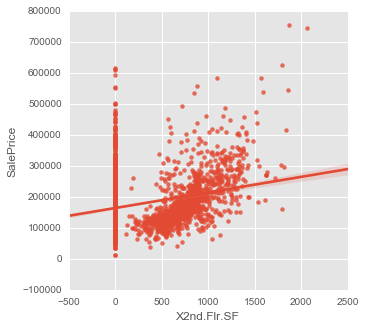

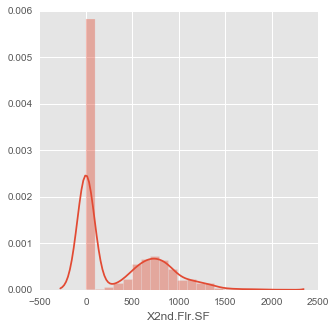

count    2930.000000
mean      335.455973
std       428.395715
min         0.000000
25%         0.000000
50%         0.000000
75%       703.750000
max      2065.000000
Name: X2nd.Flr.SF, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.26937336]
 [ 0.26937336  1.        ]]



Information About  Low.Qual.Fin.SF :

Scatter Plot with Trend Line: 



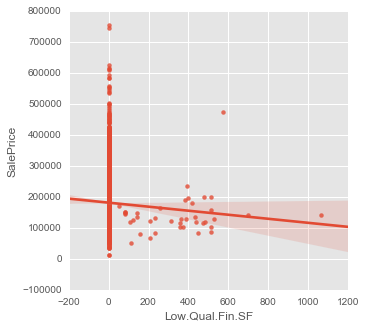

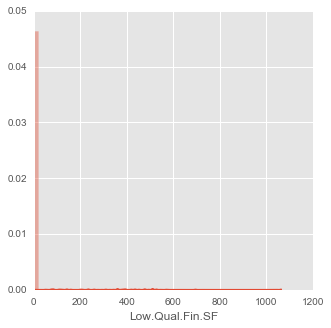

count    2930.000000
mean        4.676792
std        46.310510
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: Low.Qual.Fin.SF, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.         -0.03765977]
 [-0.03765977  1.        ]]



Information About  Gr.Liv.Area :

Scatter Plot with Trend Line: 



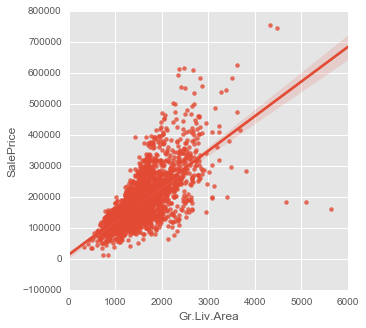

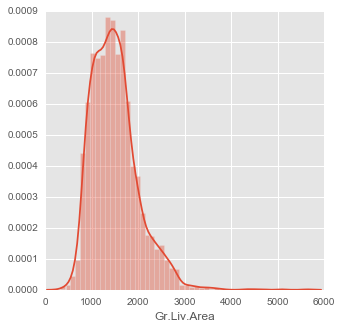

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr.Liv.Area, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.70677992]
 [ 0.70677992  1.        ]]



Information About  Bsmt.Full.Bath :

Scatter Plot with Trend Line: 



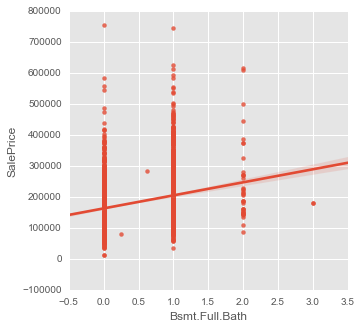

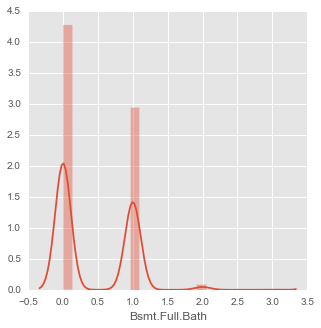

count    2930.000000
mean        0.431354
std         0.524664
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Bsmt.Full.Bath, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.27619439]
 [ 0.27619439  1.        ]]



Information About  Bsmt.Half.Bath :

Scatter Plot with Trend Line: 



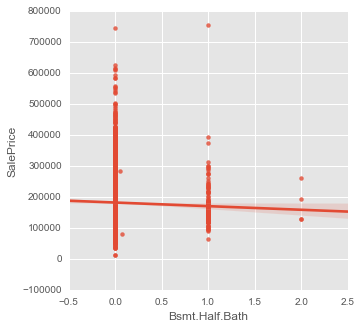

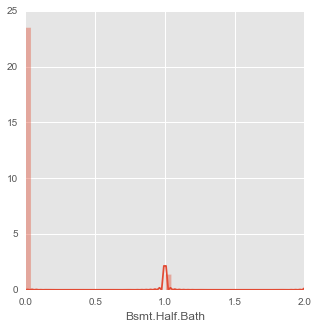

count    2930.000000
mean        0.061134
std         0.245170
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Bsmt.Half.Bath, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.         -0.03585568]
 [-0.03585568  1.        ]]



Information About  Full.Bath :

Scatter Plot with Trend Line: 



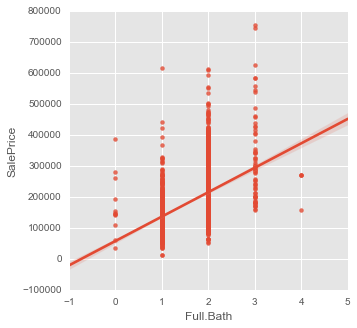

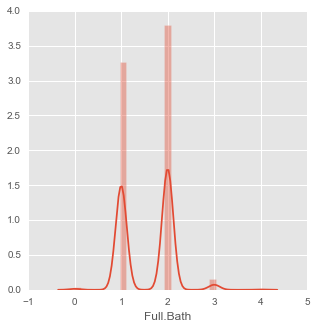

count    2930.000000
mean        1.566553
std         0.552941
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Full.Bath, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.         0.5456039]
 [ 0.5456039  1.       ]]



Information About  Half.Bath :

Scatter Plot with Trend Line: 



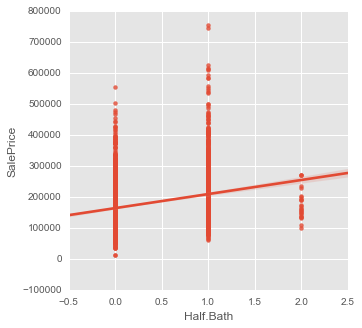

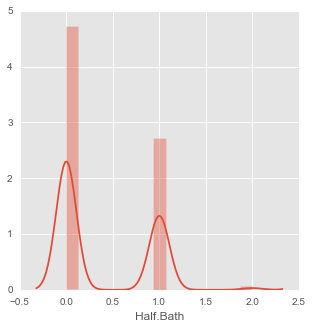

count    2930.000000
mean        0.379522
std         0.502629
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Half.Bath, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.28505603]
 [ 0.28505603  1.        ]]



Information About  Bedroom.AbvGr :

Scatter Plot with Trend Line: 



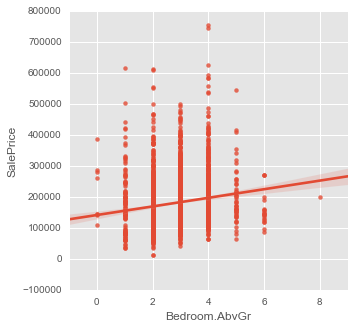

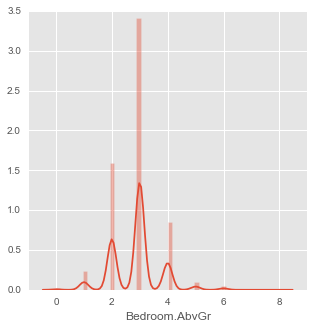

count    2930.000000
mean        2.854266
std         0.827731
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: Bedroom.AbvGr, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.14391343]
 [ 0.14391343  1.        ]]



Information About  Kitchen.AbvGr :

Scatter Plot with Trend Line: 



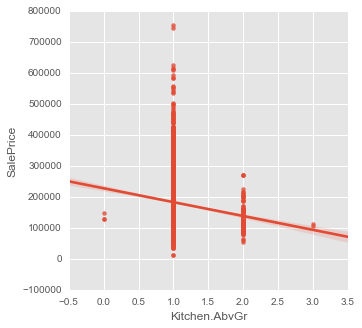

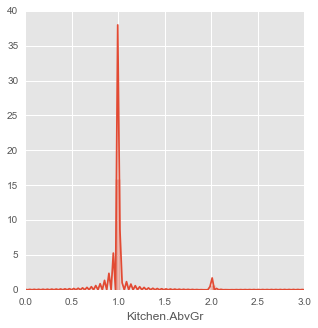

count    2930.000000
mean        1.044369
std         0.214076
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Kitchen.AbvGr, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.         -0.11981372]
 [-0.11981372  1.        ]]



Information About  Kitchen.Qual :



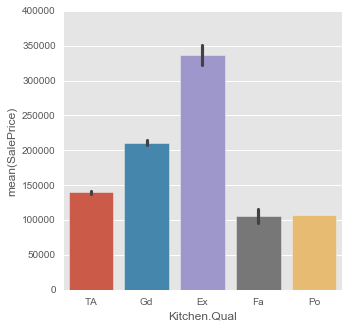



Information About  TotRms.AbvGrd :

Scatter Plot with Trend Line: 



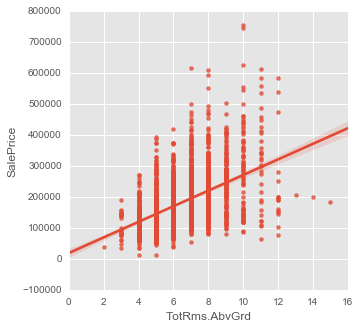

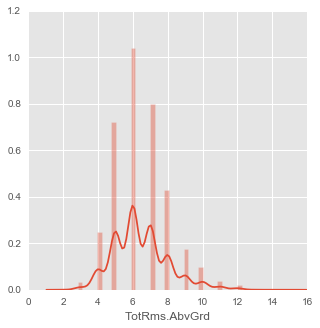

count    2930.000000
mean        6.443003
std         1.572964
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: TotRms.AbvGrd, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.49547442]
 [ 0.49547442  1.        ]]



Information About  Functional :



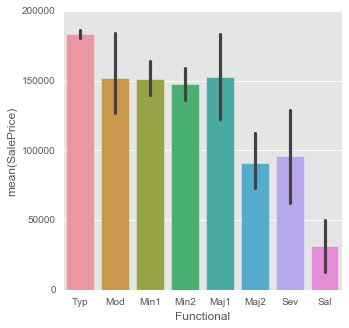



Information About  Fireplaces :

Scatter Plot with Trend Line: 



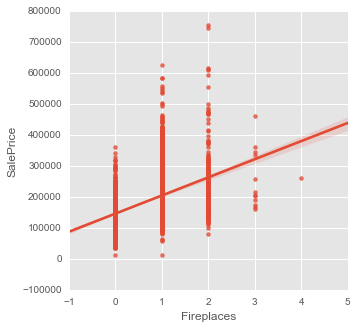

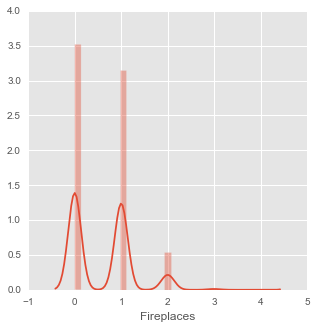

count    2930.000000
mean        0.599317
std         0.647921
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Fireplaces, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.47455809]
 [ 0.47455809  1.        ]]



Information About  Garage.Type :



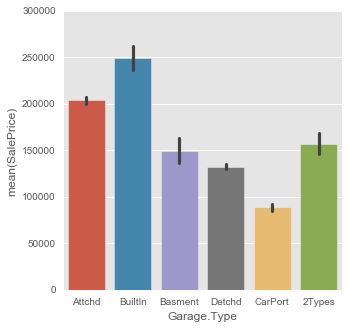



Information About  Garage.Yr.Blt :



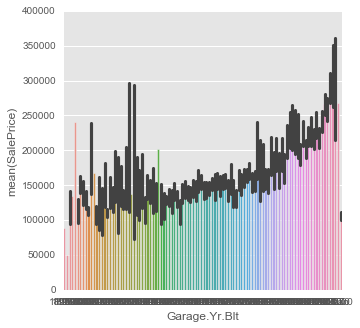



Information About  Garage.Finish :



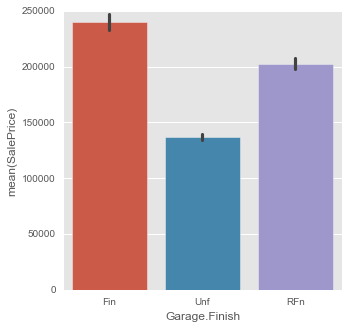



Information About  Garage.Cars :



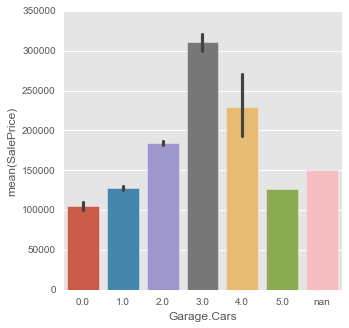



Information About  Garage.Area :

Scatter Plot with Trend Line: 



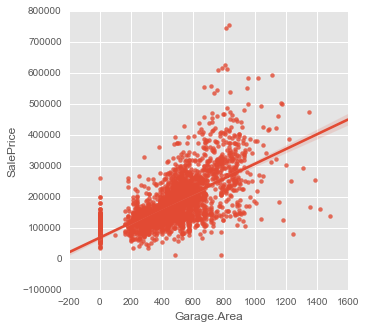

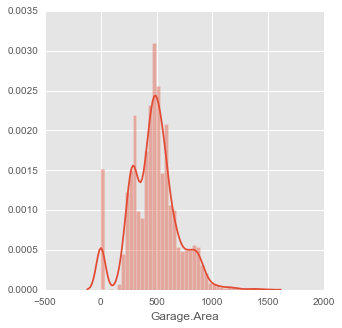

count    2930.000000
mean      472.802146
std       215.011943
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: Garage.Area, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.         0.6404098]
 [ 0.6404098  1.       ]]



Information About  Garage.Qual :



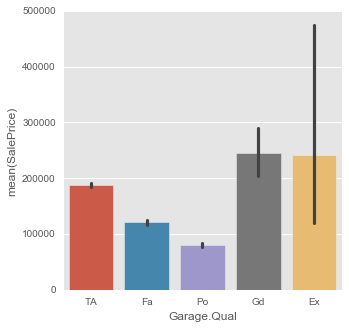



Information About  Garage.Cond :



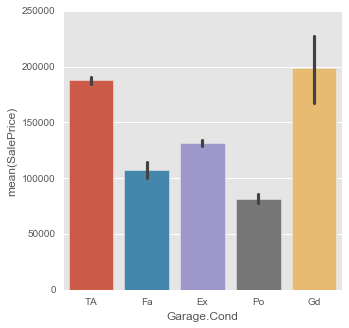



Information About  Paved.Drive :



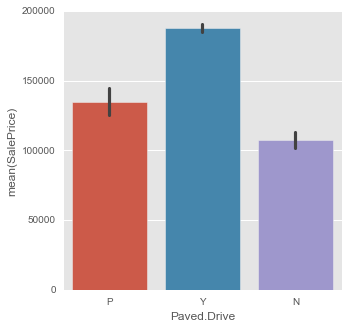



Information About  Wood.Deck.SF :

Scatter Plot with Trend Line: 



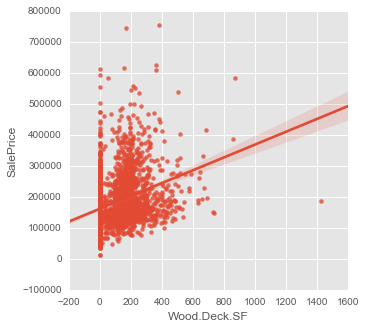

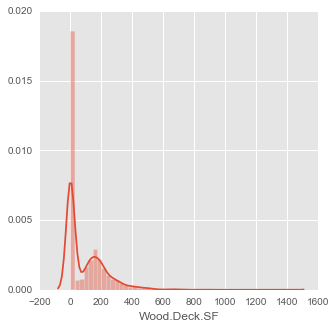

count    2930.000000
mean       93.751877
std       126.361562
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: Wood.Deck.SF, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.32714317]
 [ 0.32714317  1.        ]]



Information About  Open.Porch.SF :

Scatter Plot with Trend Line: 



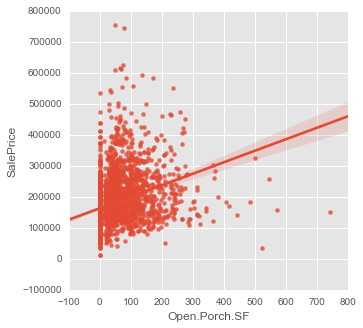

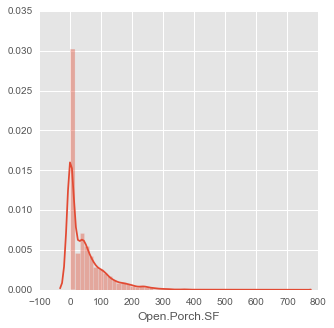

count    2930.000000
mean       47.533447
std        67.483400
min         0.000000
25%         0.000000
50%        27.000000
75%        70.000000
max       742.000000
Name: Open.Porch.SF, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.31295051]
 [ 0.31295051  1.        ]]



Information About  Enclosed.Porch :

Scatter Plot with Trend Line: 



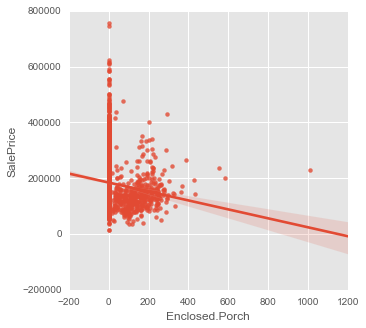

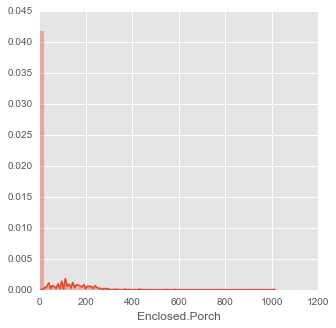

count    2930.000000
mean       23.011604
std        64.139059
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1012.000000
Name: Enclosed.Porch, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.         -0.12878744]
 [-0.12878744  1.        ]]



Information About  X3Ssn.Porch :

Scatter Plot with Trend Line: 



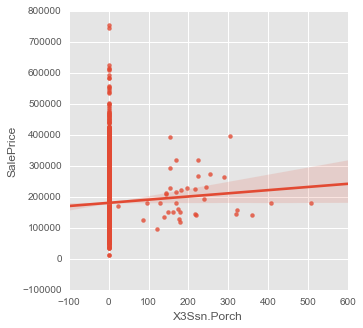

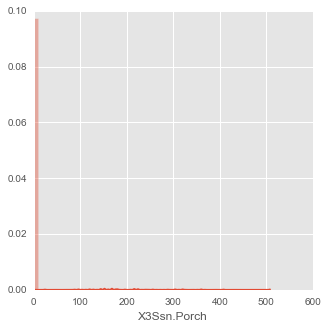

count    2930.000000
mean        2.592491
std        25.141331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: X3Ssn.Porch, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.03222465]
 [ 0.03222465  1.        ]]



Information About  Screen.Porch :

Scatter Plot with Trend Line: 



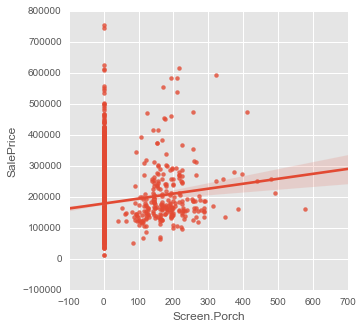

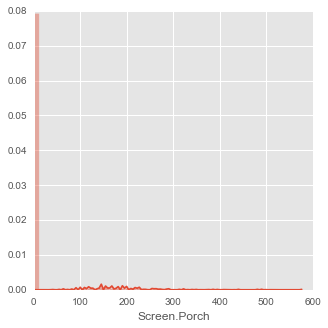

count    2930.000000
mean       16.002048
std        56.087370
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: Screen.Porch, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.11215121]
 [ 0.11215121  1.        ]]



Information About  Pool.Area :

Scatter Plot with Trend Line: 



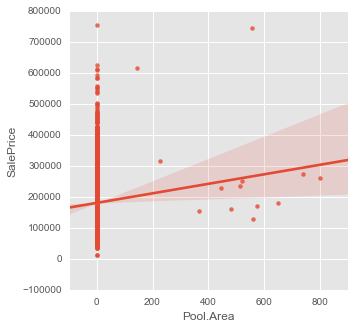

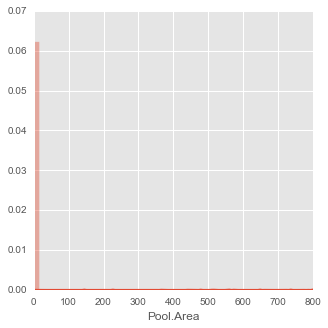

count    2930.000000
mean        2.243345
std        35.597181
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Pool.Area, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.06840325]
 [ 0.06840325  1.        ]]



Information About  Mo.Sold :



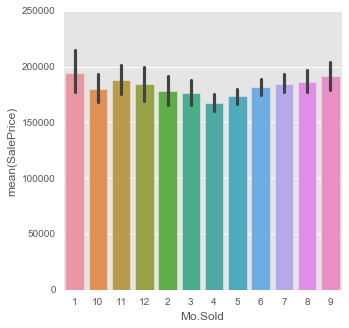



Information About  Yr.Sold :



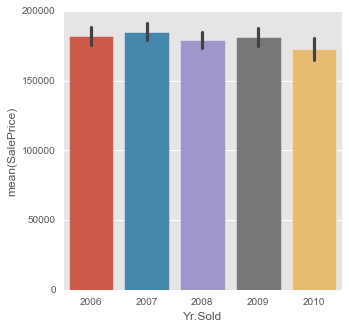



Information About  Sale.Type :



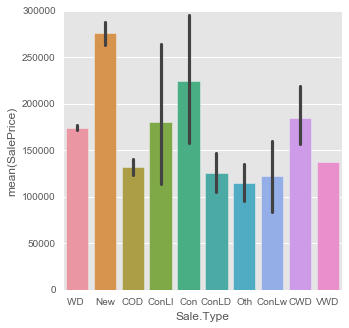



Information About  Sale.Condition :



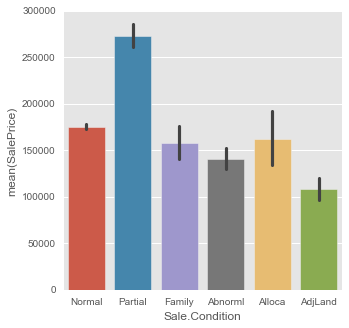

In [421]:
exploreFeatures(cleanData)

Based on this analysis, we see that there is a clear trend between Overall.Qual, Central.Air and SalePrice -- higher Qual or Y Central.Air means higher SalePrice, weaker positive correlations between Year Built, Overall Condition, Fireplaces and SalePrice. We also see a slgith positive correlation between Year.Remod.Add and SalePrice

More importantly, we also see that some of the continuous variables have skewed histograms - We solve this issue by using a log transform on such variables. Any feature that has a skew of over 0.7, we perform log transform.

In [428]:
# finding numeric features that have a skew of over 0.7
from scipy.stats import skew

numericFeats = [feat for feat in cleanData.columns if (cleanData[feat].dtype != 'object')]

skewFeats = [feat for feat in numericFeats if skew(cleanData[feat]) > 0.7]

In [430]:
# replace such features with a log-transformed version
for feat in skewFeats:
    cleanData[feat] = np.log1p(cleanData[feat]) # x => log(x + 1)

We also look at a visualization of the correlations of the numerical variables.

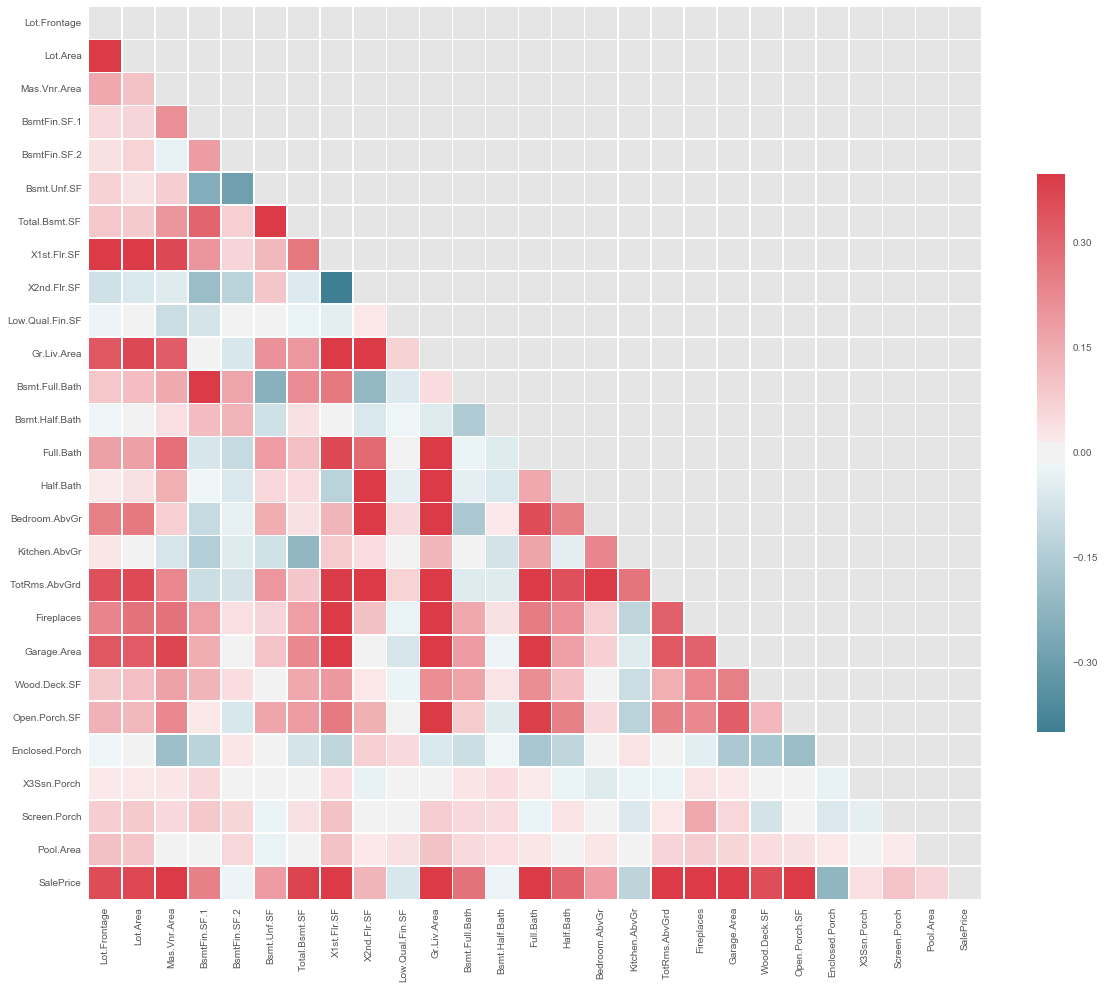

In [431]:
# generate the correlation matrix (only lower triangle)

plt.rcParams['figure.figsize'] = (20, 20)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

corr = cleanData.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

Typically, it is evident from here, that there arent many issues of multi-collinearity. Plus The last row shows us how well the numerical features correlate with SalePrice. However, low the scale -- the dark red only corresponds a correlation of around 0.5, which is still quite low. 

## Data Analysis

For our data analysis, we will first use Gradient Tree Boosting, which will use regression trees are as the base function.

The advantages of GBRT are (with thanks to sklearn documentation):
- Natural handling of data of mixed type (= heterogeneous features)
- Predictive power
- Robustness to outliers in output space (via robust loss functions)

Next, we will repeat this process by using AdaBoost. 

The results obtained will then be compared.

We use a 5-fold cross validation to look for the best model parameters, which is applied to the training dataset. We use R^2 as the metric to measure performance (the target variable is continuous) during the training phase, and final testing performance is reported as MAE. 

These parameters are then applied to build a final model using the training set. This model is then applied to the testing set, which provides us with final model performance.

First we split the data into train (70%) and test (30%)

In [469]:
# create dummy variables for the categorical data
cleanDataWithDummies = pd.get_dummies(cleanData)

In [472]:
from sklearn.cross_validation import train_test_split
X, y = cleanDataWithDummies.ix[:,cleanDataWithDummies.columns!='SalePrice'], cleanDataWithDummies['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=seed)

In [484]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

In [475]:
# a function that performs quick cross-validation and prints visuals

from sklearn.cross_validation import KFold, cross_val_score,  StratifiedKFold

#Function to measure the MAE based on different parameters
def calc_params(X, y, clf, param_values, param_name, K):

    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        #print(param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation or stratified bootstrap validation
        cv = KFold(len(X), K, shuffle=True, random_state=99)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            
            k_train_scores[j] = clf.score([X[k] for k in train], y[train])
            k_test_scores[j] = clf.score([X[k] for k in test], y[test])
       
       # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.figure()
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='Test', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation R^2 value")
    plt.show()

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

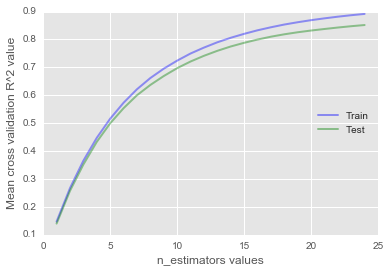

In [480]:
gb = GradientBoostingRegressor(random_state=seed).fit(X_train, y_train) # initialize the regressor
nEsts = list(range(1,25,1))
train_scores, test_scores = calc_params(X_train, y_train, gb, nEsts, 'n_estimators', 5)

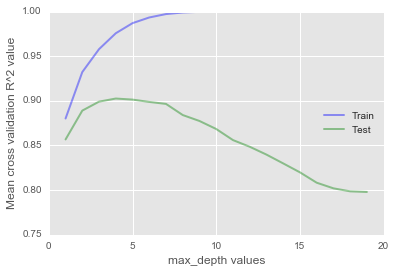

In [478]:
gb = GradientBoostingRegressor(random_state=seed).fit(X_train, y_train) # re-initialize the regressor
maxDepth = list(range(1,5,1))
train_scores, test_scores = calc_params(X_train, y_train, gb, splitSizes, 'max_depth', 5)

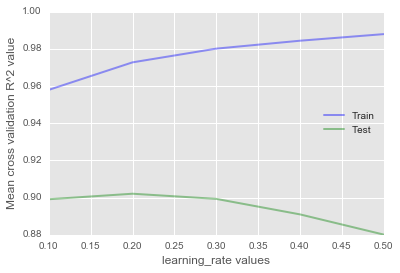

In [479]:
gb = GradientBoostingRegressor(random_state=seed).fit(X_train, y_train) # re-initialize the regressor
learningRate = [0.1,0.2,0.3,0.4,0.5]
train_scores, test_scores = calc_params(X_train, y_train, gb, learningRate, 'learning_rate', 5)

Based on these cross validation plots, we can see that the best values are:
- Number of estimators: 22
- max depth: 2
- learning rate: 0.2

Using these values, we build our final model. And test it out on the test set.

In [491]:
# building out the final model
gb_final = GradientBoostingRegressor(random_state=seed, learning_rate=0.2, max_depth=2, n_estimators=22).fit(X_train, y_train)

In [493]:
y_pred_gb = gb_final.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_gb)
print 'the mean absolute error of this model is ', mae

the mean absolute error of this model is  0.0972499174412


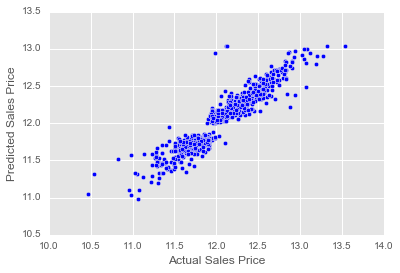

In [495]:
# We also visualize the results
plt.scatter(y_test, y_pred_gb)
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price (GB)')
plt.show()

In addition, we repeat the same process with AdaBoost Regressor. 

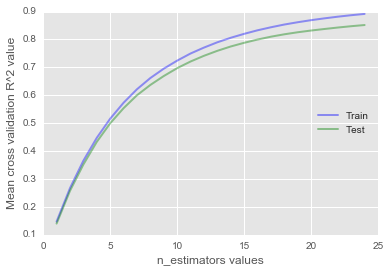

In [485]:
ad = AdaBoostRegressor(random_state=seed).fit(X_train, y_train) # initialize the regressor
nEsts = list(range(1,25,1))
train_scores, test_scores = calc_params(X_train, y_train, gb, nEsts, 'n_estimators', 5)

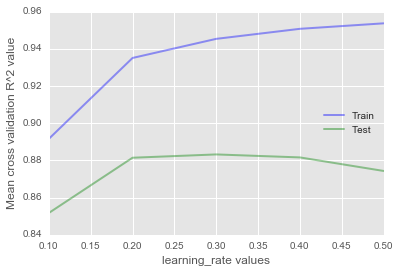

In [486]:
ad = AdaBoostRegressor(random_state=seed).fit(X_train, y_train) # re-initialize the regressor
learningRate = [0.1,0.2,0.3,0.4,0.5]
train_scores, test_scores = calc_params(X_train, y_train, gb, learningRate, 'learning_rate', 5)

Based on these cross validation plots, we can see that the best values are:
- Number of estimators: 22
- learning rate: 0.2

Using these values, we build our final model. And test it out on the test set.

In [496]:
ad_final = AdaBoostRegressor(random_state=seed, learning_rate=0.2,n_estimators=22).fit(X_train, y_train) 
y_pred_ad = ad_final.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_ad)
print 'the mean absolute error of this model is ', mae

the mean absolute error of this model is  0.133105732193


We now look to see a plot of the actual y vs the predicted y via adaboost.

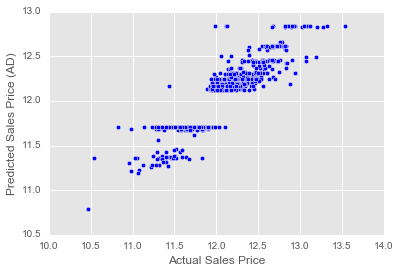

In [497]:
# We also visualize the results
plt.scatter(y_test, y_pred_ad)
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price (AD)')
plt.show()

We also look at a plot of the predictions using adaboost vs predictions using gradient boosting.

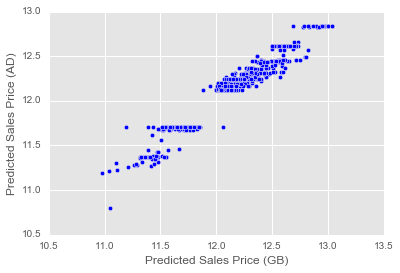

In [499]:
plt.scatter(y_pred_gb, y_pred_ad)
plt.xlabel('Predicted Sales Price (GB)')
plt.ylabel('Predicted Sales Price (AD)')
plt.show()

## Conclusion

Based on this analysis, we were able to use an unclean dataset with many features and a large number of missing values, to make highly effective predictions of housing prices. We first cleaned the dataset by removing unnecessary features, then analysed the missing values. Features with a large number of missing values, but no noticeable pattern, were removed from the analysis. We then iterated through the remaining features with missing values and filled in linear regression, if the feature was numeric or by giving it a class that corresponded to the class that gave the lowest difference between the corresponding SalesPrice mean SalesPrice/class. 

Next, we explored the variables further and generated detailed visualization. Based on these visualizations we noticed that some of the numerical variables were skewed. Hence, those variables that had a skew of > 0.7 were tranformed using a log transformation. 

